<a href="https://colab.research.google.com/github/icaromedeiros/cifar10/blob/main/9_Artificial_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

An artificial neural network (ANN) is the piece of a computing system designed to simulate the way the human brain analyzes and processes information.

### Structure of the neurons

The general structure of a generic neuron is shown in the following figure:

![image.png](attachment:image.png)

Neurons receive signals and produce a response. The branches to the left are the transmission channels for incoming information and are called dendrites. Dendrites receive the signals at the contact region with other cells, the so-called synapses. The output signals are transmitted by the axon, of which each cell has at most one. Some cells do not have an axon, because their task is only to set some cells in contact with others (in the retina, for example).

## Artificial neural network

![image.png](attachment:image.png)

* **Set of inputs**: $x_j(t)$

* **Pattern of connectivity**: The strength of the connection between any two units will determine the extent to which the activation state of one unit can affect the activation state of another unit at a subsequent time point. It can be represented by $w_{ij}$.

* **Propagation rule**: This rule takes the vector x(t) for the processing units sending activation and combines it with the connectivity $w_{ij}$ to produce a summed or net input into each receiving unit: $h_{i}(t) = \sum_{j}w_{ij}x_{j}$.

* **Activation rule**: to specify how the net inputs to a given unit are combined to produce its new activation state: $y_i = f_i(h_i(t))$.

![image.png](attachment:image.png)

Frequently, an additional parameter $\theta_i$ is added: this parameter is the so-called threshold.

## Neural Network

**Multi-Layer Perceptrons (MLPs)** are one of the most popular artificial neural net structures in Machine Learning. For Deep Learning, there are other important structures such as CNN, LSTM.

![image.png](attachment:image.png)

* $x_i$: input pattern
* $y_i$: responses of the hidden layer
* $z_k$: reponses of the output layer
* $t^\mu_k$: target pattern
* $\mu$: number of patterns
* $w_{ji}$: weights of the hidden layer
* $w'_{kj}$: weights of the output layer
* $\theta_j$: thresholds of the hidden layer
* $\theta'_j$: thresholds of the output layer

MLP operation is described by:

![image.png](attachment:image.png)

where $f$ and $g$ are a sigmoid activation function:



![image.png](attachment:image.png)

The importance of this architecture is that Multilayer perceptron with as few as hidden layers using sigmoid functions is capable of approximating any measurable function from one finite dimensional space to another to any desired degree of accuracy, provided sufficiently many hidden units are available. In this sense, MLP are a **class of universal approximators**.

### Example using different number of hidden neurons

We create an spiral with two clusters:

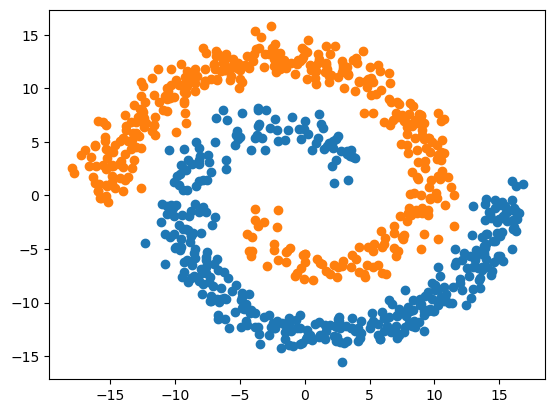

In [ ]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

N = 400
theta = np.sqrt(np.random.rand(N))*2*pi

r_a = 2*theta + pi
data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T
x_a = data_a + np.random.randn(N,2)

r_b = -2*theta - pi
data_b = np.array([np.cos(theta)*r_b, np.sin(theta)*r_b]).T
x_b = data_b + np.random.randn(N,2)

plt.scatter(x_a[:,0],x_a[:,1])
plt.scatter(x_b[:,0],x_b[:,1])
plt.show()

We prepare dataset for the Neural Network:

In [ ]:
import pandas as pd
data_a = pd.DataFrame([x_a[:,0], x_a[:,1]]).T
data_a.columns = ["x", "y"]
data_a["class"] = "A"
data_a

,x,y,class
0,3.520040,3.645493,A
1,15.012648,-5.652429,A
2,-8.824881,-4.353616,A
3,-4.257895,-10.974323,A
4,-7.873671,-1.062426,A
...,...,...,...
395,16.368042,-2.233921,A
396,9.830673,-9.612492,A
397,12.103332,-6.021812,A
398,-1.538347,-13.375777,A


In [ ]:
import pandas as pd
data_b = pd.DataFrame([x_b[:,0], x_b[:,1]]).T
data_b.columns = ["x", "y"]
data_b["class"] = "B"
data_b

,x,y,class
0,-4.077211,-3.897552,B
1,-13.598884,1.723048,B
2,10.493703,3.344046,B
3,2.950753,12.174412,B
4,9.505771,-1.845213,B
...,...,...,...
395,-15.549770,2.868500,B
396,-11.797286,11.006647,B
397,-12.485027,7.799108,B
398,-0.632861,12.243908,B


In [ ]:
data = pd.concat([data_a, data_b])
data

,x,y,class
0,3.520040,3.645493,A
1,15.012648,-5.652429,A
2,-8.824881,-4.353616,A
3,-4.257895,-10.974323,A
4,-7.873671,-1.062426,A
...,...,...,...
395,-15.549770,2.868500,B
396,-11.797286,11.006647,B
397,-12.485027,7.799108,B
398,-0.632861,12.243908,B


We create some MLP models with different number of neurons in the hidden layer:

Model... (1/8)
Model... (2/8)
Model... (3/8)
Model... (4/8)
Model... (5/8)
Model... (6/8)
Model... (7/8)
Model... (8/8)


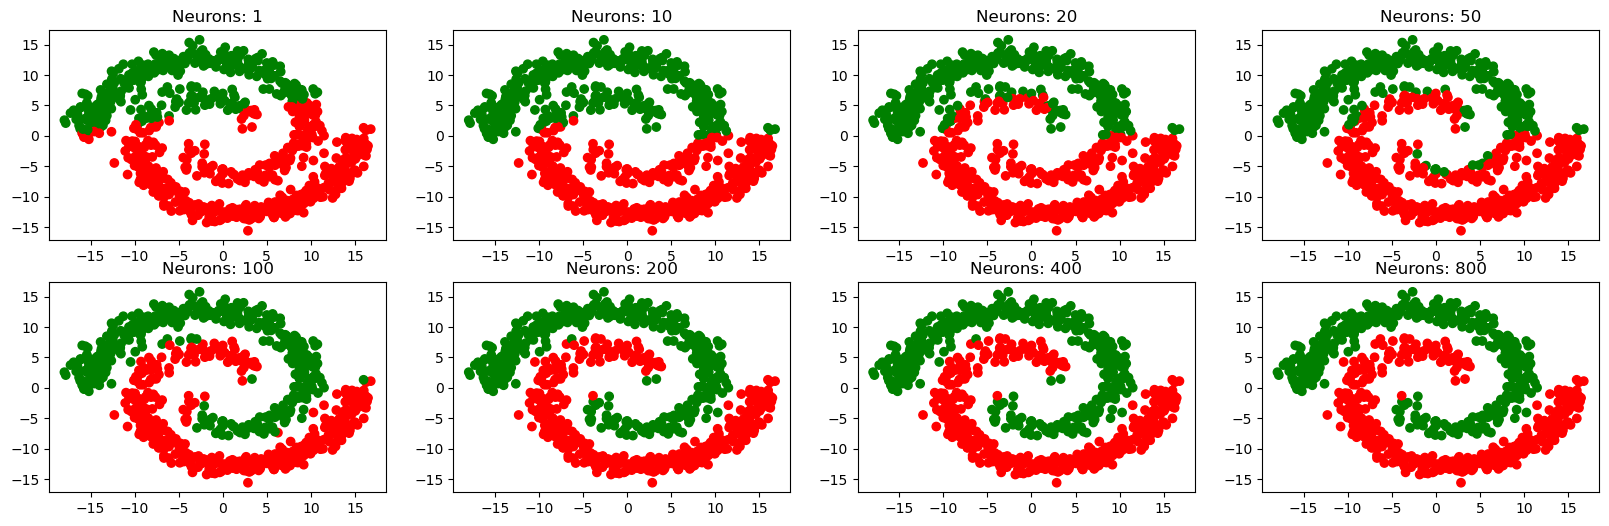

In [ ]:
import warnings
import sklearn.neural_network

fig, axs = plt.subplots(2, 4, figsize=(20, 6))
neurons = [1, 10, 20, 50, 100, 200, 400, 800]

index = 1
for i in range(0,2):
    for j in range(0,4):
        print("Model... (" + str(index) + "/"+ str(len(neurons)) + ")")
        model = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=neurons[index-1], random_state=12)
        model.fit(data[["x","y"]], data["class"])
        predict_values = model.predict(data[["x","y"]])
        colors = {"A":"red", "B":"green"}
        axs[i,j].scatter(data["x"],data["y"], c=np.vectorize(colors.get)(predict_values))
        axs[i,j].set_title("Neurons: " + str(neurons[index-1]))
        index +=1

Model... (1/8)
Model... (2/8)
Model... (3/8)
Model... (4/8)
Model... (5/8)
Model... (6/8)
Model... (7/8)
Model... (8/8)


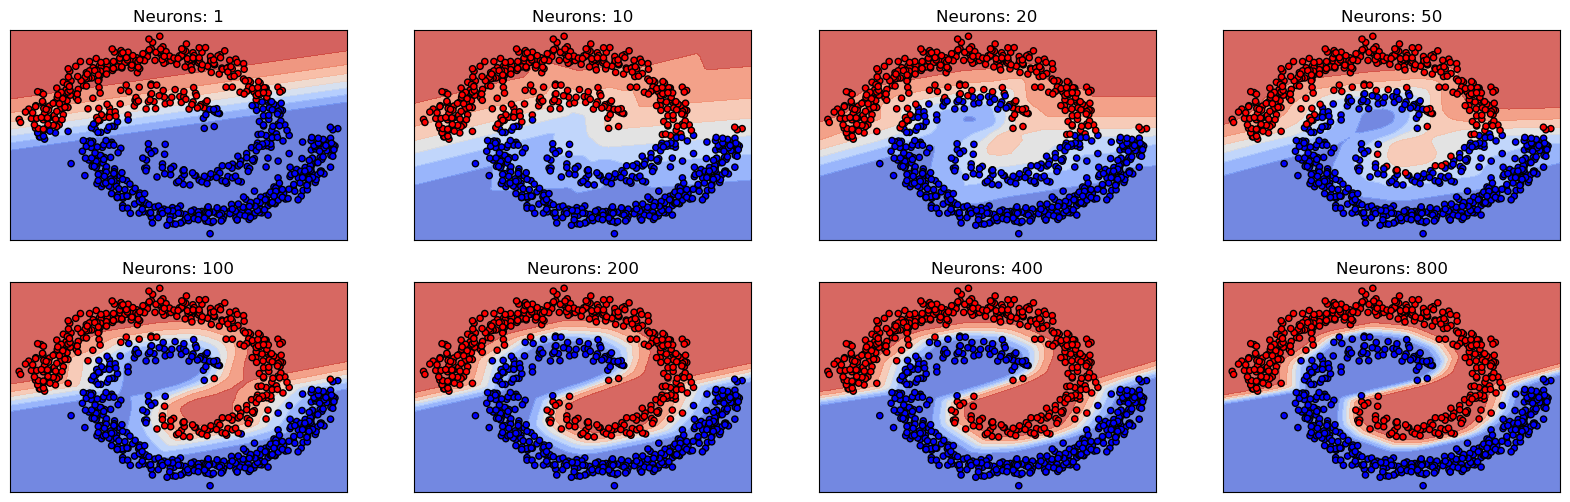

In [ ]:
import sklearn.neural_network
from sklearn.inspection import DecisionBoundaryDisplay

fig, axs = plt.subplots(2, 4, figsize=(20, 6))
neurons = [1, 10, 20, 50, 100, 200, 400, 800]

index = 1
for i in range(0,2):
    for j in range(0,4):
        print("Model... (" + str(index) + "/"+ str(len(neurons)) + ")")
        model = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=neurons[index-1], random_state=12)
        model.fit(data[["x","y"]].values, data["class"].values)

        ax = axs[i, j]
        disp = DecisionBoundaryDisplay.from_estimator(
            model,
            data[["x","y"]].values,
            cmap=plt.cm.coolwarm,
            alpha=0.8,
            ax=ax
        )
        
        predict_values = model.predict(data[["x","y"]])
        colors = {"A": "blue", "B": "red"}
        points = np.vectorize(colors.get)(predict_values)
        
        ax.scatter(data[["x"]].values, data[["y"]].values, c=points, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title("Neurons: " + str(neurons[index-1]))
        index +=1
        
    
plt.show()

# Different architectures

Model... (1/8)
Model... (2/8)
Model... (3/8)
Model... (4/8)
Model... (5/8)
Model... (6/8)
Model... (7/8)
Model... (8/8)


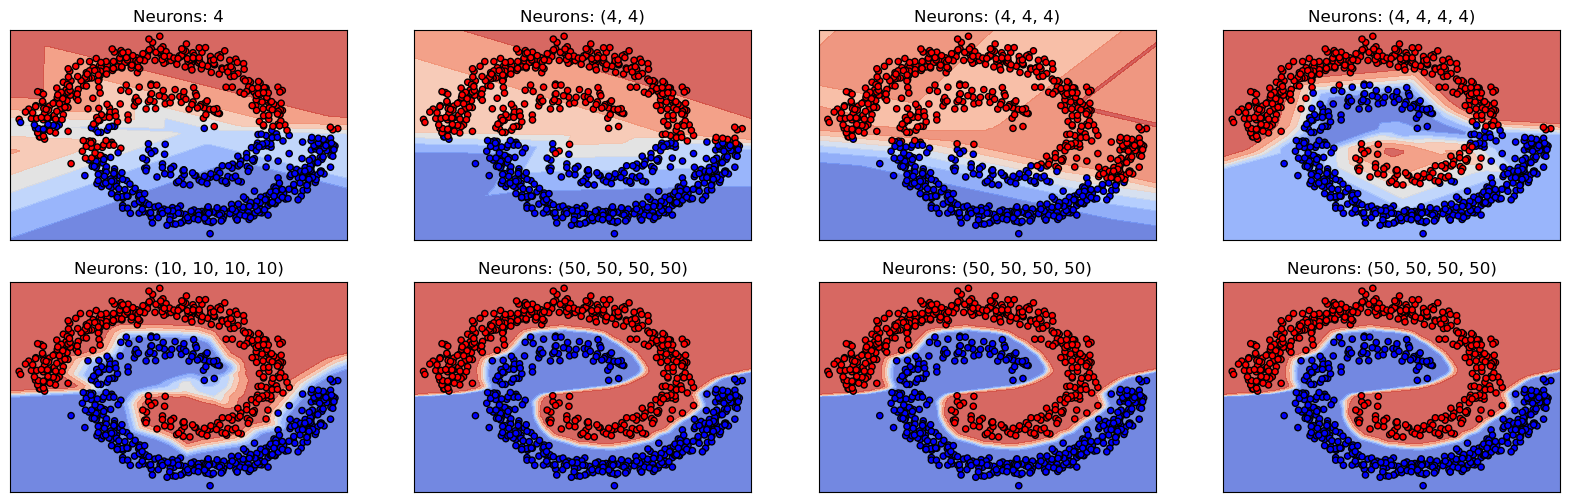

In [ ]:
import sklearn.neural_network

fig, axs = plt.subplots(2, 4, figsize=(20, 6))
neurons = [(4), (4,4), (4,4,4), (4,4,4,4), (10,10,10,10), (50,50,50,50), (50,50,50,50), (50,50,50,50)]

index = 1
for i in range(0,2):
    for j in range(0,4):
        print("Model... (" + str(index) + "/"+ str(len(neurons)) + ")")
        model = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=neurons[index-1], random_state=12)
        model.fit(data[["x","y"]].values, data["class"].values)

        ax = axs[i, j]
        disp = DecisionBoundaryDisplay.from_estimator(
            model,
            data[["x","y"]].values,
            cmap=plt.cm.coolwarm,
            alpha=0.8,
            ax=ax
        )
        
        predict_values = model.predict(data[["x","y"]])
        colors = {"A": "blue", "B": "red"}
        points = np.vectorize(colors.get)(predict_values)
        
        ax.scatter(data[["x"]].values, data[["y"]].values, c=points, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title("Neurons: " + str(neurons[index-1]))
        index +=1
        
    
plt.show()